Python 3

Now we would start our journey with "US Baby Names 1880-2010"

## P.28, 29

In [1]:
# Using the UNIX head command to see a data structure
!head -n 10 names/yob1880.txt

In [2]:
import pandas as pd

In [3]:
# Reading csv file with "pd.read_csv" 
# If we put index, those indexes will show up in the dataframe.
# There is a misspelled word, so change "birth" into "births
names1880 = pd.read_csv('names/yob1880.txt', names = ['name', 'sex', 'births'])

In [4]:
names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


## P.30

In [5]:
# Classify the data by "sex," then get the sum of Male and Female respectively.
names1880.groupby('sex')['births'].sum()

sex
F     90992
M    110491
Name: births, dtype: int64

In [6]:
# Loading files for the analysis

# We have years from 1880 to 2016 so range(1880, 2017) will generate number from 1880 to 2016
years = range(1880, 2017) 

# pieces would be the list where dataframe is appended to
pieces = [] 
# columns would be the columns used for every year.
columns = ['name', 'sex', 'births']

# Reading data with "for clause"
for year in years:  # reading year from 'years' starting from 1880
    path = 'names/yob%d.txt' % year  # to transform the number into a file format, this line is needed
    frame = pd.read_csv(path, names = columns) # put the transformed file name into the "pd.read_csv()" 
    
    frame['year'] = year # The original yob1880.txt ~ yob2016.txt file didn't have year section. 
                         # So we are adding it for every iteration 
    pieces.append(frame) # appending loaded frame to the list called, "pieces"

In [7]:
# pieces look just like this.
pieces

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 5      Margaret   F    1578  1880
 6           Ida   F    1472  1880
 7         Alice   F    1414  1880
 8        Bertha   F    1320  1880
 9         Sarah   F    1288  1880
 10        Annie   F    1258  1880
 11        Clara   F    1226  1880
 12         Ella   F    1156  1880
 13     Florence   F    1063  1880
 14         Cora   F    1045  1880
 15       Martha   F    1040  1880
 16        Laura   F    1012  1880
 17       Nellie   F     995  1880
 18        Grace   F     982  1880
 19       Carrie   F     949  1880
 20        Maude   F     858  1880
 21        Mabel   F     808  1880
 22       Bessie   F     796  1880
 23       Jennie   F     793  1880
 24     Gertrude   F     787  1880
 25        Julia   F     783  1880
 26       Hattie   F     769  1880
 27        Edith   F

In [8]:
# We want to make these individual dataframe into one dataframe
names = pd.concat(pieces, ignore_index = True)
names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


What does "ignore_index" do?

In [9]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2], ignore_index = False)  # False is a default
# look at the index! 0 -> 1 -> 0 -> 1
# compare this with the next one

0    a
1    b
0    c
1    d
dtype: object

In [10]:
pd.concat([s1, s2], ignore_index = True)
# now the index is completely merged in an ascending order! 0 -> 1 -> 2 -> 3

0    a
1    b
2    c
3    d
dtype: object

Now, back to the analysis

## P.31

In [11]:
# Pivoting the table to see how many babies are born every year grouped by 'sex'
total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
total_births[:10]

sex,F,M
year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144533,110784
1887,145981,101415
1888,178624,120851


About pivot table

In [12]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"],
                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [13]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], # index is literally basic category of your analysis
...             columns=['C'], aggfunc=sum) # 'aggfunc = sum' gives you the sum of each category
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

Now, back to analysis

In [14]:
# This shows you the tail of the data. 
# By default, the number of unit is 5, however, if you want to disply more, you can.
# eg) total_births.tail(10)
total_births.tail()

sex,F,M
year,,
2012,1756347,1892094
2013,1749061,1885683
2014,1779496,1913434
2015,1776538,1907211
2016,1756647,1880674


In [15]:
total_births.tail(10)

sex,F,M
year,,
2007,1920231,2072975
2008,1888177,2037309
2009,1834048,1980491
2010,1774186,1915331
2011,1755278,1895156
2012,1756347,1892094
2013,1749061,1885683
2014,1779496,1913434
2015,1776538,1907211


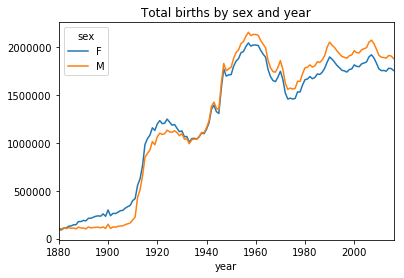

In [16]:
import matplotlib.pyplot as plt
total_births.plot(title = 'Total births by sex and year')
plt.show()

## P.32

Let's insert a proportion of the babies' name relative to the total number of birth each year.

In [17]:
def add_prop(group):
    births = group.births # whatever plugged into the position of "group," is defined as "births"
                          # You don't have to put ".astype(float)", since we are using python3.
    group['prop'] = births/births.sum() # Create a new variable called "prop" and put the proportion in it.
    return group # Return a group with a new column

In [18]:
# To see how the dataframe is changed, let's first take a look at the original form of "names."
names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [19]:
# I wanted to see what happens if we don't use the "groupby" method.
names1 = add_prop(names)
names1[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.000021
1,Anna,F,2604,1880,0.000008
2,Emma,F,2003,1880,0.000006
3,Elizabeth,F,1939,1880,0.000006
4,Minnie,F,1746,1880,0.000005
5,Margaret,F,1578,1880,0.000005
6,Ida,F,1472,1880,0.000004
7,Alice,F,1414,1880,0.000004
8,Bertha,F,1320,1880,0.000004
9,Sarah,F,1288,1880,0.000004


In [20]:
# group the "names" by year and sex and then apply add_prop function.
names = names.groupby(['year', 'sex']).apply(add_prop) 
names[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


It looks almost the same at first, but pretty different if we look at the 'prop' section.
Then what might have made the difference, can you guess? You would find out right away.

In [21]:
# Let's stop and see if the proportion adds up to 1.
import numpy as np
#1
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [28]:
# But what if we don't apply .groupby method?
#2
np.allclose(names1.groupby(['year', 'sex']).prop.sum(), 1)

False

In [29]:
# Let's go for one more trick.
#3
np.allclose(names1.prop.sum(), 1)

True

It is natural that we got True from the #1. We already grouped them with 'year' and 'sex.' Hence, the numerator was the number of birth of every name per year when the denominator was the total number of birth per year.

Let us dig deeper into why we didn't get True from the #2. Since it was not grouped by 'year' and 'sex,'
the entire numbers of proportion column adds up to 1, which we can find from the #3. 

Now we know that using groupby makes a big difference and that leads us to have deeper insight into the data.

In [31]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]

In [47]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000)) # indexing from 0 to the last

In [50]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## P.33 Analyzing Naming Trends

In [56]:
boys = top1000[top1000['sex'] == 'M'] # if items in the 'sex' the same with 'M', let's call them 'boys.'
boys[:10]

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086269
944,James,M,5927,1880,0.053642
945,Charles,M,5348,1880,0.048402
946,George,M,5126,1880,0.046393
947,Frank,M,3242,1880,0.029342
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022119
951,Robert,M,2415,1880,0.021857


In [58]:
girls = top1000[top1000['sex'] == 'F'] # if items in the 'sex' the same with 'F', let's call them 'girls.'
girls[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [83]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)
# only pull out data from births, 
# and turn it into a dataframe having 'year' as its index
# and driving columns only from 'name'
# 
total_births.loc['1971':'1987']

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1971,NaN,NaN,NaN,NaN,NaN,8408.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,NaN,NaN,NaN,7863.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,9246.0,NaN,NaN,NaN,NaN,...,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN,NaN,10512.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,10550.0,NaN,NaN,NaN,NaN,...,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,NaN,NaN,NaN,NaN,NaN,11504.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,NaN,NaN,NaN,NaN,NaN,11781.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,NaN,NaN,NaN,NaN,NaN,12470.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,NaN,NaN,NaN,NaN,NaN,13218.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 1880 to 2016
Columns: 7100 entries, Aaden to Zyaire
dtypes: float64(7100)
memory usage: 7.4 MB


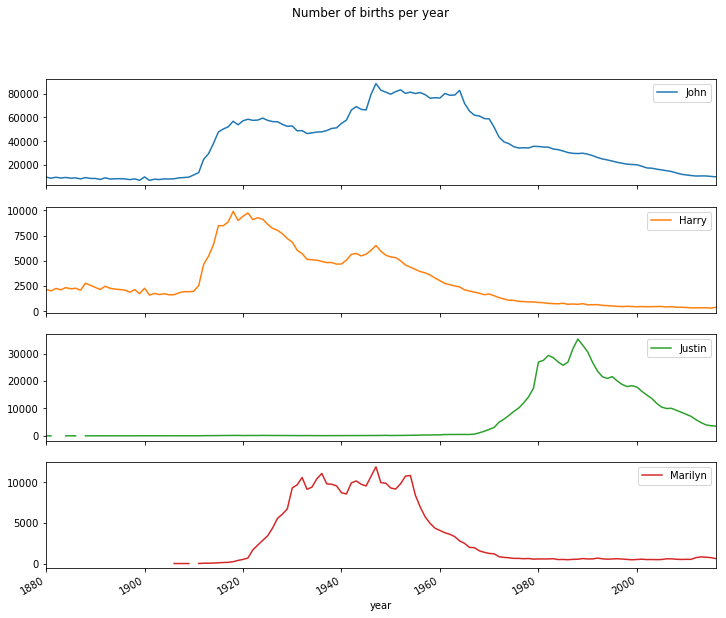

In [87]:
subset = total_births[['John', 'Harry', 'Justin', 'Marilyn']]
subset.plot(subplots = True, figsize = (12, 10), grid = False, title = "Number of births per year")
plt.show()

## P.34 Measuring the increase in naming diversity

If the sum of the proportion of top1000 names decrease, then it shows that diversity is getting bigger.

In [92]:
# With the 'prop' column, 
# We would set the year as a index, 
#'F' and 'M' would be columns
#'aggfunc = sum': add every proportion of top1000 of male and female respectively
table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)

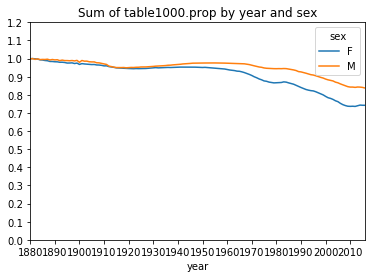

In [97]:
# np.linspace(start, end, number of interval)
# range(start, end, interval)
table.plot(title = 'Sum of table1000.prop by year and sex', yticks = np.linspace(0, 1.2, 13), xticks = range(1880, 2020, 10))
plt.show()

In [98]:
# Trend of boy name in 2010
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,22110,2010,0.011544
260878,Ethan,M,17995,2010,0.009395
260879,Michael,M,17336,2010,0.009051
260880,Jayden,M,17163,2010,0.008961
260881,William,M,17042,2010,0.008898
260882,Alexander,M,16749,2010,0.008745
260883,Noah,M,16442,2010,0.008584
260884,Daniel,M,15827,2010,0.008263
260885,Aiden,M,15531,2010,0.008109
260886,Anthony,M,15482,2010,0.008083


## P.35

Purpose: How many of the most popular name do we need to reach 50%?
1st: sort values in descending order so that we can add big number first
2nd: add values cumulatively
3rd: pinpoint the index whose cumulative sum value reach to 0.5

In [101]:
# 1st & 2nd step
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum[:10]

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038951
260881    0.047849
260882    0.056593
260883    0.065178
260884    0.073441
260885    0.081550
260886    0.089633
Name: prop, dtype: float64

In [102]:
# 3rd step
prop_cumsum.values.searchsorted(0.5)
# Since arrays are zero-indexed, we should add one

116

## P.36

In [106]:
df = boys[boys.year == 1900]

In [107]:
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1 # add one because of zero indexing

25

In [110]:
# Now, we felt some need to do this in a smart way using function
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by = 'prop', ascending = False) 
    return group.prop.cumsum().values.searchsorted(q) + 1

In [111]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [112]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


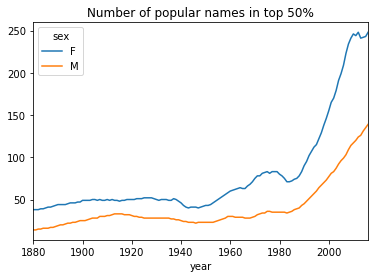

In [115]:
diversity.plot(title = 'Number of popular names in top 50%')
plt.show()

The more number needed to reach 50%, the more diverse the name.
Girl's diversity has always been better than boys. From the early 80s, the diversity of both male and female skyrocketed. What's more, the gap between boys and girls become larger.

## P.37 The "Last letter" Revolution

Purpose: Check if the distribution of boy names by final letter has changed a lot.

In [116]:
get_last_letter = lambda x: x[-1]

In [117]:
# From names, select the 'name' column and apply get_last_letter and return x[-1] for each name
last_letters = names.name.map(get_last_letter)

In [141]:
last_letters.head() # Let's see how the head of the dataframe looks like

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

In [142]:
last_letters.name = 'last_letter'

In [143]:
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

What did the "input 142" do?
If you compare the "output 141" and "output 143", you can find out the difference.

Name: name -> Name: last_letter

In [144]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


In [159]:
# From the dataframe 'names,' 
#'births' should be the value, but add them if they share the same last letter (aggfunc = sum)
# last_letters should be index,
# 'sex' and 'year' should show up as columns
table = names.pivot_table('births', index = last_letters, columns = ['sex', 'year'], aggfunc = sum)

In [160]:
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41912.0  48089.0  49616.0  53883.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2007      2008   
last_letter                               ...                          
a            48942.0  59441.0  58631.0    ...      34743.0   33013.0   
b                NaN      NaN      NaN    ...      42218.0   40074.0   
c                NaN      NaN      NaN    ...      26907.0   25384.0   
d             1027.0   1298.0   1374.0    ...      50724.0   48049.0   
e            54352.0  66749.0  66662.0    ...     143975.0  141305.0   

sex                                                                      \
year             2009      2010      2011      2012      2013      2014   
last_letter                                                               
a             31601.0   28846.0   27426.0   27186.0   27388.0   28214.0   
b             39070.0   39252.0   36648.0   34685.0   33189.0   31302.0   
c             24144.0   23332.0   23112.0   24256.0   24035.0   23783.0   
d             46334.0   44795.0   43211.0   42436.0   42625.0   43957.0   
e            135947.0  130187.0  128705.0  128345.0  132025.0  131847.0   

sex                              
year             2015      2016  
last_letter                      
a             28913.0   29454.0  
b             29516.0   26812.0  
c             23068.0   21912.0  
d             43671.0   42748.0  
e            128217.0  125222.0  

[5 rows x 274 columns]

In [161]:
# only take out years '1910, 1960, 2010'
# level = 'year' is functioning as a reference for [1910, 1960, 2010] 
# if level = 'year' is not included, [1910, 1960, 2010] is nothing but a list with no meaning
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')

In [162]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691272.0  676436.0    977.0    5211.0   28846.0
b                 NaN     694.0     455.0    411.0    3912.0   39252.0
c                 5.0      49.0     955.0    482.0   15463.0   23332.0
d              6751.0    3729.0    2639.0  22113.0  262170.0   44795.0
e            133601.0  435062.0  316555.0  28665.0  178809.0  130187.0

In [163]:
# To normalize numbers with plugging in proportion relative to the total birth each year, we get the sum
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022104.0
     2010    1774186.0
M    1910     194215.0
     1960    2132705.0
     2010    1915331.0
dtype: float64

In [164]:
# normalizing
letter_prop = subtable / subtable.sum()

In [165]:
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273383  0.341858  0.381266  0.005031  0.002443  0.015061
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000538  0.002482  0.007250  0.012182
d            0.017026  0.001844  0.001487  0.113858  0.122928  0.023388
e            0.336949  0.215153  0.178423  0.147594  0.083841  0.067971

## P.38

In [168]:
# We already imported matplotlib.pyplot as plt, hence there is no need to reimport matplotlib.pyplot

# Before drawing two figures at once, defining the size and shape is needed, which "fig, axes" is doing.
# .subplots(a, b, figsize = (c, d)) == 'a' by 'b' matrix, the size would be c for width, d for length
fig, axes = plt.subplots(2, 1, figsize = (12, 10))

# "rot = 0" means the character "a to z" should be in the right position. You might realize what it does down below.
# ax = axes[0], axes[1] set the order of display
# The reason for the latter one having "legend = False" is that we don't need another legend, since we have it in the upper one.
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female', legend = False )

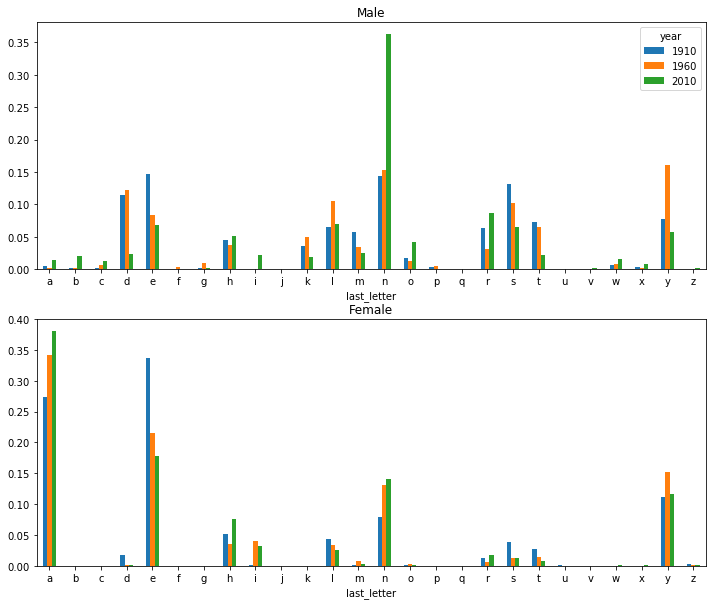

In [169]:
plt.show()

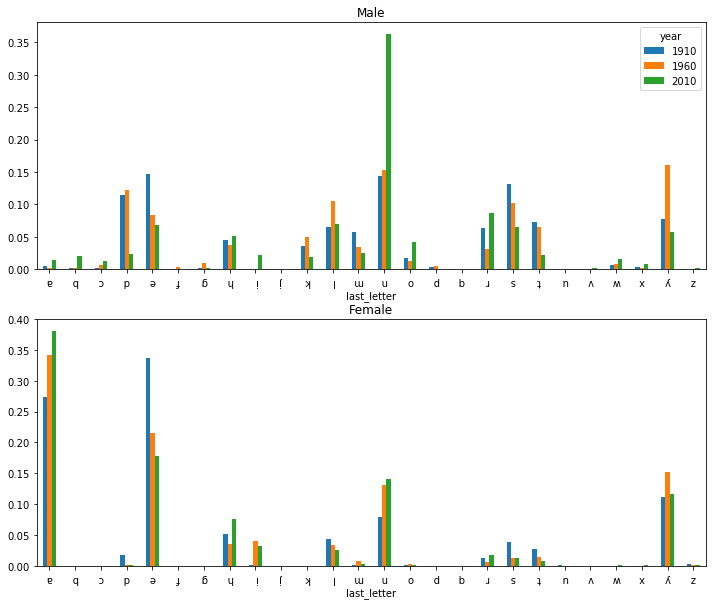

In [173]:
fig, axes = plt.subplots(2, 1, figsize = (12, 10))
letter_prop['M'].plot(kind = 'bar', rot = 180, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 180, ax = axes[1], title = 'Female', legend = False )
plt.show()

## P.38

In [175]:
# Now, we want to get every proportion of the "table."
letter_prop = table / table.sum()

In [176]:
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41912.0  48089.0  49616.0  53883.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2007      2008   
last_letter                               ...                          
a            48942.0  59441.0  58631.0    ...      34743.0   33013.0   
b                NaN      NaN      NaN    ...      42218.0   40074.0   
c                NaN      NaN      NaN    ...      26907.0   25384.0   
d             1027.0   1298.0   1374.0    ...      50724.0   48049.0   
e            54352.0  66749.0  66662.0    ...     143975.0  141305.0   

sex                                                                      \
year             2009      2010      2011      2012      2013      2014   
last_letter                                                               
a             31601.0   28846.0   27426.0   27186.0   27388.0   28214.0   
b             39070.0   39252.0   36648.0   34685.0   33189.0   31302.0   
c             24144.0   23332.0   23112.0   24256.0   24035.0   23783.0   
d             46334.0   44795.0   43211.0   42436.0   42625.0   43957.0   
e            135947.0  130187.0  128705.0  128345.0  132025.0  131847.0   

sex                              
year             2015      2016  
last_letter                      
a             28913.0   29454.0  
b             29516.0   26812.0  
c             23068.0   21912.0  
d             43671.0   42748.0  
e            128217.0  125222.0  

[5 rows x 274 columns]

In [177]:
letter_prop.head()

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345591  0.343447  0.338776  0.341254  0.338552  0.341272   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007212  0.007100  0.006479   
e            0.366845  0.370624  0.374595  0.373155  0.372725  0.372898   

sex                                                    ...            M  \
year             1886      1887      1888      1889    ...         2007   
last_letter                                            ...                
a            0.339715  0.335263  0.332772  0.328712    ...     0.016760   
b                 NaN       NaN       NaN       NaN    ...     0.020366   
c                 NaN       NaN       NaN       NaN    ...     0.012980   
d            0.006967  0.007035  0.007267  0.007703    ...     0.024469   
e            0.372808  0.372322  0.373684  0.373737    ...     0.069453   

sex                                                                      \
year             2008      2009      2010      2011      2012      2013   
last_letter                                                               
a            0.016204  0.015956  0.015061  0.014472  0.014368  0.014524   
b            0.019670  0.019727  0.020494  0.019338  0.018332  0.017601   
c            0.012460  0.012191  0.012182  0.012195  0.012820  0.012746   
d            0.023585  0.023395  0.023388  0.022801  0.022428  0.022605   
e            0.069359  0.068643  0.067971  0.067913  0.067832  0.070014   

sex                                        
year             2014      2015      2016  
last_letter                                
a            0.014745  0.015160  0.015661  
b            0.016359  0.015476  0.014257  
c            0.012429  0.012095  0.011651  
d            0.022973  0.022898  0.022730  
e            0.068906  0.067227  0.066584  

[5 rows x 274 columns]

In [182]:
# select letter ['d','n', 'y'] indexes from Male column('M') and transpose(T) it.
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


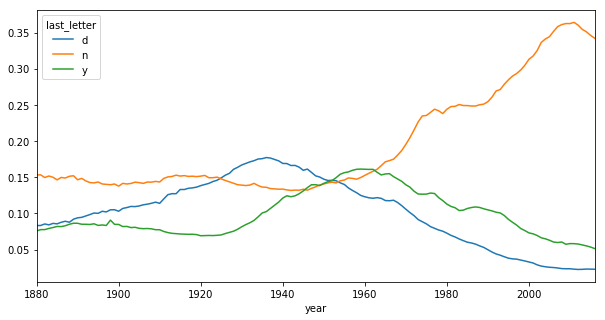

In [188]:
dny_ts.plot(figsize = (10, 5))
plt.show()

## P.39 Boy names that became girl names (and vice versa)

In [191]:
# Get every name that is in the top1000 without overlap
all_names = top1000.name.unique()

In [193]:
# Create an array after we make every name into a lowercase letter(.lower())
# and find a name including "lesl" to find lesley_like name
mask = np.array(['lesl' in x.lower() for x in all_names])
mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [194]:
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Jad', 'Jeremias', 'Wesson'], dtype=object)

In [195]:
# Taking out names that has value of True from the all_names
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [197]:
# Let's call it "filtered" that is taken out of top1000['name'] 
# which matches the array, "lesley_like" (.isin(lesley_like))
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.head()

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083


In [198]:
# Group the "filtered" dataframe with name 
# Sum up all the births for each name category
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376857
Lesly      11432
Name: births, dtype: int64

## P.40

In [207]:
# Make a table out of "filtered"
# Value would be drived from births('births') summing('aggfunc = sum') all the lasley_like names frequency
# index would be 'year' (index = 'year')
# columns would be comprised of 'F' and 'M' (columns = 'sex')

table = filtered.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [208]:
# Getting the proportion of Female and Male every year
# 'axis = 0' (0: index-wise / 1: column-wise)
# table.sum(a) == every row would add up to 'a' (if axis = 0)
# table.sum(a) == all columns would add up to 'a' (if axis = 1) 

table = table.div(table.sum(1), axis = 0)
table.tail()

sex,F,M
year,,
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN


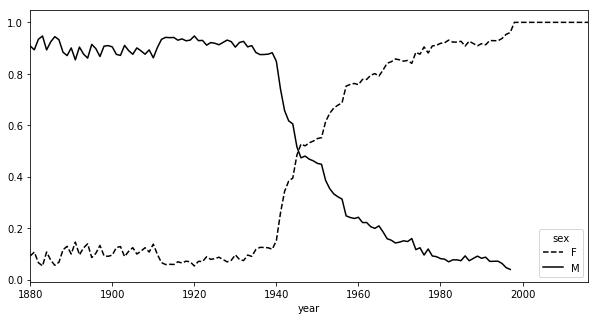

In [210]:
table.plot(figsize = (10, 5), style ={'M': 'k-', 'F': 'k--'})
plt.show()